In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import math
import time
import seaborn as sns
import warnings
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data.csv', on_bad_lines='skip')
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,allFeatures,lemmatised,snow_stemmed,noun,stem_lemm,lemm_stem,lemm_noun,noun_lemm
0,15970,men,apparel,topwear,shirts,navy blue,fall,2011.0,casual,turtle check men navy blue shirt,15970.jpg,shirtmen turtle topwear men fall shirts check ...,shirtmen turtle topwear men fall shirt check b...,shirtmen turtl topwear men fall shirt check bl...,shirtmen men shirts apparel,shirtmen turtle topwear men fall shirt check b...,shirtmen turtl topwear men fall shirt check bl...,shirtmen men shirts apparel,shirtmen turtle topwear men fall shirt check b...
1,39386,men,apparel,bottomwear,jeans,blue,summer,2012.0,casual,peter england men party blue jeans,39386.jpg,peter party men summer jeansmen blue bottomwea...,peter party men summer jeansmen blue bottomwea...,peter parti men summer jeansmen blue bottomwea...,peter party men summer jeansmen england appare...,peter party men summer jeansmen blue bottomwea...,peter parti men summer jeansmen blue bottomwea...,peter party men summer jeansmen england appare...,peter party men summer jeansmen blue bottomwea...
2,59263,women,accessories,watches,watches,silver,winter,2016.0,casual,titan women silver watch,59263.jpg,silver watchwomen titan accessories winter wat...,silver watchwomen titan accessory winter watch...,silver watchwomen titan accessori winter watch...,silver watchwomen accessories watches women,silver watchwomen titan accessory winter watch...,silver watchwomen titan accessori winter watch...,silver watchwomen accessories watches women,silver watchwomen titan accessory winter watch...
3,21379,men,apparel,bottomwear,track pants,black,fall,2011.0,casual,manchester united men solid black track pants,21379.jpg,solid black pantsmen track men fall united bot...,solid black pantsmen track men fall united bot...,solid black pantsmen track men fall unit botto...,pantsmen men manchester pants,solid black pantsmen track men fall united bot...,solid black pantsmen track men fall unit botto...,pantsmen men manchester pants,solid black pantsmen track men fall united bot...
4,53759,men,apparel,topwear,tshirts,grey,summer,2012.0,casual,puma men grey tshirt,53759.jpg,topwear men tshirts summer puma grey apparel t...,topwear men tshirts summer puma grey apparel t...,topwear men tshirt summer puma grey apparel ts...,men tshirts summer puma grey apparel tshirtmen,topwear men tshirts summer puma grey apparel t...,topwear men tshirt summer puma grey apparel ts...,men tshirts summer puma grey apparel tshirtmen,topwear men tshirts summer puma grey apparel t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41686,42234,women,apparel,topwear,tops,blue,summer,2012.0,casual,sepia women blue printed top,42234.jpg,topwomen topwear printed sepia summer tops blu...,topwomen topwear printed sepia summer top blue...,topwomen topwear print sepia summer top blue a...,topwomen summer tops women,topwomen topwear printed sepia summer top blue...,topwomen topwear print sepia summer top blue a...,topwomen summer tops women,topwomen topwear printed sepia summer top blue...
41687,17036,men,footwear,shoes,casual shoes,white,summer,2013.0,casual,gas men caddy casual shoe,17036.jpg,caddy casual men summer shoemen white shoes ga...,caddy casual men summer shoemen white shoe gas...,caddi casual men summer shoemen white shoe gas...,men summer shoemen shoes gas,caddy casual men summer shoemen white shoe gas...,caddi casual men summer shoemen white shoe gas...,men summer shoemen shoes gas,caddy casual men summer shoemen white shoe gas...
41688,6461,men,footwear,flip flops,flip flops,red,summer,2011.0,casual,lotto mens soccer track flip flop,6461.jpg,flip lotto flopmen track summer mens soccer re...,flip lotto flopmen track summer men soccer red...,flip lotto flopmen track summer men soccer red...,flip lotto flopmen summer mens soccer flops,flip lotto flopmen track summer men soccer red...,flip lotto flopmen 

In [3]:
df['test'] = df['gender'] + ' ' + df['masterCategory'] + ' ' + df['subCategory'] + ' ' + df['articleType'] + ' ' + df['baseColour'] 
df['vision'] = np.random.randint(2, size=len(df))
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,...,allFeatures,lemmatised,snow_stemmed,noun,stem_lemm,lemm_stem,lemm_noun,noun_lemm,test,vision
0,15970,men,apparel,topwear,shirts,navy blue,fall,2011.0,casual,turtle check men navy blue shirt,...,shirtmen turtle topwear men fall shirts check ...,shirtmen turtle topwear men fall shirt check b...,shirtmen turtl topwear men fall shirt check bl...,shirtmen men shirts apparel,shirtmen turtle topwear men fall shirt check b...,shirtmen turtl topwear men fall shirt check bl...,shirtmen men shirts apparel,shirtmen turtle topwear men fall shirt check b...,men apparel topwear shirts navy blue,1
1,39386,men,apparel,bottomwear,jeans,blue,summer,2012.0,casual,peter england men party blue jeans,...,peter party men summer jeansmen blue bottomwea...,peter party men summer jeansmen blue bottomwea...,peter parti men summer jeansmen blue bottomwea...,peter party men summer jeansmen england appare...,peter party men summer jeansmen blue bottomwea...,peter parti men summer jeansmen blue bottomwea...,peter party men summer jeansmen england appare...,peter party men summer jeansmen blue bottomwea...,men apparel bottomwear jeans blue,1
2,59263,women,accessories,watches,watches,silver,winter,2016.0,casual,titan women silver watch,...,silver watchwomen titan accessories winter wat...,silver watchwomen titan accessory winter watch...,silver watchwomen titan accessori winter watch...,silver watchwomen accessories watches women,silver watchwomen titan accessory winter watch...,silver watchwomen titan accessori winter watch...,silver watchwomen accessories watches women,silver watchwomen titan accessory winter watch...,women accessories watches watches silver,0
3,21379,men,apparel,bottomwear,track pants,black,fall,2011.0,casual,manchester united men solid black track pants,...,solid black pantsmen track men fall united bot...,solid black pantsmen track men fall united bot...,solid black pantsmen track men fall unit botto...,pantsmen men manchester pants,solid black pantsmen track men fall united bot...,solid black pantsmen track men fall unit botto...,pantsmen men manchester pants,solid black pantsmen track men fall united bot...,men apparel bottomwear track pants black,1
4,53759,men,apparel,topwear,tshirts,grey,summer,2012.0,casual,puma men grey tshirt,...,topwear men tshirts summer puma grey apparel t...,topwear men tshirts summer puma grey apparel t...,topwear men tshirt summer puma grey apparel ts...,men tshirts summer puma grey apparel tshirtmen,topwear men tshirts summer puma grey apparel t...,topwear men tshirt summer puma grey apparel ts...,men tshirts summer puma grey apparel tshirtmen,topwear men tshirts summer puma grey apparel t...,men apparel topwear tshirts grey,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41686,42234,women,apparel,topwear,tops,blue,summer,2012.0,casual,sepia women blue printed top,...,topwomen topwear printed sepia summer tops blu...,topwomen topwear printed sepia summer top blue...,topwomen topwear print sepia summer top blue a...,topwomen summer tops women,topwomen topwear printed sepia summer top blue...,topwomen topwear print sepia summer top blue a...,topwomen summer tops women,topwomen topwear printed sepia summer top blue...,women apparel topwear tops blue,1
41687,17036,men,footwear,shoes,casual shoes,white,summer,2013.0,casual,gas men caddy casual shoe,...,caddy casual men summer shoemen white shoes ga...,caddy casual men summer shoemen white shoe gas...,caddi casual men summer shoemen white shoe gas...,men summer shoemen shoes gas,caddy casual men summer shoemen white shoe gas...,caddi casual men summer shoemen white shoe gas...,men summer shoemen shoes gas,caddy casual men summer shoemen white shoe gas...,men footwear shoes casual shoes white,1
41688,6461,men,footwear,flip flops,flip flops,red,summer,2011.0,casual,lotto mens soccer track flip flop,...,flip lotto flopmen tra

In [4]:
half_size = len(df) // 5
df_copy = df.iloc[:half_size]
df_copy

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,...,allFeatures,lemmatised,snow_stemmed,noun,stem_lemm,lemm_stem,lemm_noun,noun_lemm,test,vision
0,15970,men,apparel,topwear,shirts,navy blue,fall,2011.0,casual,turtle check men navy blue shirt,...,shirtmen turtle topwear men fall shirts check ...,shirtmen turtle topwear men fall shirt check b...,shirtmen turtl topwear men fall shirt check bl...,shirtmen men shirts apparel,shirtmen turtle topwear men fall shirt check b...,shirtmen turtl topwear men fall shirt check bl...,shirtmen men shirts apparel,shirtmen turtle topwear men fall shirt check b...,men apparel topwear shirts navy blue,1
1,39386,men,apparel,bottomwear,jeans,blue,summer,2012.0,casual,peter england men party blue jeans,...,peter party men summer jeansmen blue bottomwea...,peter party men summer jeansmen blue bottomwea...,peter parti men summer jeansmen blue bottomwea...,peter party men summer jeansmen england appare...,peter party men summer jeansmen blue bottomwea...,peter parti men summer jeansmen blue bottomwea...,peter party men summer jeansmen england appare...,peter party men summer jeansmen blue bottomwea...,men apparel bottomwear jeans blue,1
2,59263,women,accessories,watches,watches,silver,winter,2016.0,casual,titan women silver watch,...,silver watchwomen titan accessories winter wat...,silver watchwomen titan accessory winter watch...,silver watchwomen titan accessori winter watch...,silver watchwomen accessories watches women,silver watchwomen titan accessory winter watch...,silver watchwomen titan accessori winter watch...,silver watchwomen accessories watches women,silver watchwomen titan accessory winter watch...,women accessories watches watches silver,0
3,21379,men,apparel,bottomwear,track pants,black,fall,2011.0,casual,manchester united men solid black track pants,...,solid black pantsmen track men fall united bot...,solid black pantsmen track men fall united bot...,solid black pantsmen track men fall unit botto...,pantsmen men manchester pants,solid black pantsmen track men fall united bot...,solid black pantsmen track men fall unit botto...,pantsmen men manchester pants,solid black pantsmen track men fall united bot...,men apparel bottomwear track pants black,1
4,53759,men,apparel,topwear,tshirts,grey,summer,2012.0,casual,puma men grey tshirt,...,topwear men tshirts summer puma grey apparel t...,topwear men tshirts summer puma grey apparel t...,topwear men tshirt summer puma grey apparel ts...,men tshirts summer puma grey apparel tshirtmen,topwear men tshirts summer puma grey apparel t...,topwear men tshirt summer puma grey apparel ts...,men tshirts summer puma grey apparel tshirtmen,topwear men tshirts summer puma grey apparel t...,men apparel topwear tshirts grey,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8333,4405,men,apparel,topwear,tshirts,black,summer,2011.0,casual,nirvana mens shoulder fade black tshirt,...,black topwear nirvana tshirts summer fade mens...,black topwear nirvana tshirts summer fade men ...,black topwear nirvana tshirt summer fade men s...,nirvana tshirts summer fade mens apparel tshir...,black topwear nirvana tshirts summer fade men ...,black topwear nirvana tshirt summer fade men s...,nirvana tshirts summer fade mens apparel tshir...,black topwear nirvana tshirts summer fade men ...,men apparel topwear tshirts black,1
8334,15052,men,footwear,shoes,formal shoes,black,summer,2013.0,formal,franco leone men black formal shoe,...,black franco men summer shoemen leone shoes fo...,black franco men summer shoemen leone shoe for...,black franco men summer shoemen leon shoe form...,franco men summer shoemen leone shoes footwear,black franco men summer shoemen leone shoe for...,black franco men summer shoemen leon shoe form...,franco men summer shoemen leone shoes footwear,black franco men summer shoemen leone shoe for...,men footwear shoes formal shoes black,0
8335,52795,men,accessories,w

In [5]:
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, balanced_accuracy_score
from sklearn.metrics.pairwise import cosine_similarity
import time

seed = 800

train_data = df_copy.sample(frac=0.8, random_state=seed)
test_data  = df_copy.drop(train_data.index)

def content_filtering(name, alpha=6, diversity_penalty=0.5, novelty_penalty=0.5, k=8, vision=5):
    #BOW
    vectorizer = CountVectorizer()
    vectorizer.fit(train_data[name])
    train_matrix = vectorizer.transform(train_data[name])
    test_matrix = vectorizer.transform(test_data[name])
    cosine_sim = cosine_similarity(test_matrix, train_matrix)
    predicted_labels_cosine = []
    predicted_labels_cosine_proba = []
    for i in range(len(test_data)):
        cosine_scores = cosine_sim[i]
        top_match_idx = cosine_scores.argsort()[-1]
        predicted_label = train_data.iloc[top_match_idx]['articleType']
        
        if i % 50 == 0 and predicted_label == test_data.iloc[i]['articleType']:
            cosine_scores[top_match_idx] += diversity_penalty

        if i % 50 == 0:
            for j in range(i):
                if predicted_label == predicted_labels_cosine[j]:
                    cosine_scores[top_match_idx] += novelty_penalty
        
        
        vision_score = test_data.iloc[i]['vision']
        if vision_score == 1:
            cosine_scores[top_match_idx] += vision
        if vision_score == 0:
            cosine_scores[top_match_idx] -= vision
              
        predicted_labels_cosine.append(predicted_label)
        predicted_labels_cosine_proba.append(max(cosine_scores))
    
    # KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_matrix, train_data['articleType'])
    y_pred_knn = knn.predict(test_matrix)
    y_pred_knn_proba = knn.predict_proba(test_matrix)
            
    # Combine predictions
    predicted_labels_cosine_proba = np.array(predicted_labels_cosine_proba)
    y_pred_knn_proba = np.array(y_pred_knn_proba)
    predicted_labels_cosine_proba = predicted_labels_cosine_proba.tolist()
    y_pred_knn_onehot = np.where(np.any(y_pred_knn_proba == 1, axis=1), 1, 0)
    
    count1 = 0
    count2 = 0
    uniq = df['articleType'].unique()
    uniq = list(uniq)

    predicted_labels = []
    for i in range(len(test_data)):
        label_1 = predicted_labels_cosine[i]
        label_2 = y_pred_knn[i]
        if label_1 == label_2:
            predicted_labels.append(label_1)
        else:
            if predicted_labels_cosine_proba[i] < alpha:
                if(label_1 != test_data.iloc[i]['articleType']) and (count1 != len(uniq)):
                    for j in range(len(uniq)):
                        if(uniq[j] not in predicted_labels):
                            predicted_labels.append(uniq[j])
                            break
                        else: 
                            j +=1
                            count1 +=1
                else:
                    predicted_labels.append(label_1)
            else:
                if((label_2 != test_data.iloc[i]['articleType']) and count2 != len(uniq)):
                    for j in range(len(uniq)):
                        if(uniq[j] not in predicted_labels):
                            predicted_labels.append(uniq[j])
                            break
                        else: 
                            j +=1
                            count2 += 1
                else:
                    predicted_labels.append(label_2)      

    acc = accuracy_score(test_data['articleType'], predicted_labels)
    f1 = f1_score(test_data['articleType'], predicted_labels, average='weighted')
    precision = precision_score(test_data['articleType'], predicted_labels, average='weighted')
    recall = recall_score(test_data['articleType'], predicted_labels, average='weighted')
    return predicted_labels, acc, precision, recall, f1

start_time_af = time.time()
predicted_labels, accuracy_af, precision_af, recall_af, f1_af = content_filtering('allFeatures')
print('accuracy_af:', accuracy_af)
print('precision_af:', precision_af)
print('recall_af:', recall_af)
print('f1_af:', f1_af)
end_time_af = time.time()
time_af = end_time_af - start_time_af
print('Time elapsed:', time_af, 'seconds')

accuracy_af: 0.9802158273381295
precision_af: 0.9900398775619169
recall_af: 0.9802158273381295
f1_af: 0.9841165833177518
Time elapsed: 2.44245982170105 seconds


## allFeatures

In [6]:
start_time_af = time.time()
predicted_labels, accuracy_af, precision_af, recall_af, f1_af = content_filtering('allFeatures')
print('accuracy_af:', accuracy_af)
print('precision_af:', precision_af)
print('recall_af:', recall_af)
print('f1_af:', f1_af)
end_time_af = time.time()
time_af = end_time_af - start_time_af
print('Time elapsed:', time_af, 'seconds')

accuracy_af: 0.9802158273381295
precision_af: 0.9900398775619169
recall_af: 0.9802158273381295
f1_af: 0.9841165833177518
Time elapsed: 2.3598029613494873 seconds


## lemmatised

In [7]:
start_time_lem = time.time()
predicted_labels, accuracy_lem, precision_lem, recall_lem, f1_lem = content_filtering('lemmatised')
end_time_lem = time.time()
print('accuracy_lem:', accuracy_lem)
print('precision_lem:', precision_lem)
print('recall_lem:', recall_lem)
print('f1_lem:', f1_lem)
time_lem =  end_time_lem - start_time_lem
print('Time elapsed:', time_lem, 'seconds')

accuracy_lem: 0.9802158273381295
precision_lem: 0.9898394992729919
recall_lem: 0.9802158273381295
f1_lem: 0.984249192446793
Time elapsed: 2.3320441246032715 seconds


## stemmed

In [8]:
start_time_stem = time.time()
predicted_labels, accuracy_stem, precision_stem, recall_stem, f1_stem = content_filtering('snow_stemmed')
end_time_stem = time.time()
print('accuracy_stem:', accuracy_stem)
print('precision_stem:', precision_stem)
print('recall_stem:', recall_stem)
print('f1_stem:', f1_stem)
time_stem = end_time_stem - start_time_stem
print('Time elapsed:', time_stem, 'seconds')

accuracy_stem: 0.9796163069544365
precision_stem: 0.990184498707106
recall_stem: 0.9796163069544365
f1_stem: 0.9841407218504665
Time elapsed: 2.2985639572143555 seconds


## noun

In [9]:
start_time_noun = time.time()
predicted_labels, accuracy_noun, precision_noun, recall_noun, f1_noun = content_filtering('noun')
end_time_noun = time.time()
print('accuracy_noun:', accuracy_noun)
print('precision_noun:', precision_noun)
print('recall_noun:', recall_noun)
print('f1_noun:', f1_noun)
time_noun = end_time_noun - start_time_noun
print('Time elapsed:', time_noun, 'seconds')

accuracy_noun: 0.9664268585131894
precision_noun: 0.9715408284675143
recall_noun: 0.9664268585131894
f1_noun: 0.9677450847358063
Time elapsed: 2.1062145233154297 seconds


## stem_lemm

In [10]:
start_time_stem_lemm = time.time()
predicted_labels, accuracy_stem_lemm, precision_stem_lemm, recall_stem_lemm, f1_stem_lemm = content_filtering('stem_lemm')
end_time_stem_lemm = time.time()
print('accuracy_stem_lemm:', accuracy_stem_lemm)
print('precision_stem_lemm:', precision_stem_lemm)
print('recall_stem_lemm:', recall_stem_lemm)
print('f1_stem_lemm:', f1_stem_lemm)
time_stem_lemm = end_time_stem_lemm - start_time_stem_lemm
print('Time elapsed:', time_stem_lemm, 'seconds')

accuracy_stem_lemm: 0.9802158273381295
precision_stem_lemm: 0.9898394992729919
recall_stem_lemm: 0.9802158273381295
f1_stem_lemm: 0.984249192446793
Time elapsed: 2.38014817237854 seconds


## lemm_stem

In [11]:
start_time_lemm_stem = time.time()
predicted_labels, accuracy_lemm_stem, precision_lemm_stem, recall_lemm_stem, f1_lemm_stem = content_filtering('lemm_stem')
end_time_lemm_stem = time.time()
print('accuracy_lemm_stem:', accuracy_lemm_stem)
print('precision_lemm_stem:', precision_lemm_stem)
print('recall_lemm_stem:', recall_lemm_stem)
print('f1_lemm_stem:', f1_lemm_stem)
time_lemm_stem = end_time_lemm_stem - start_time_lemm_stem
print('Time elapsed:', time_lemm_stem, 'seconds')

accuracy_lemm_stem: 0.9796163069544365
precision_lemm_stem: 0.990184498707106
recall_lemm_stem: 0.9796163069544365
f1_lemm_stem: 0.9841407218504665
Time elapsed: 2.3100247383117676 seconds


## lemm_noun

In [12]:
start_time_lemm_noun = time.time()
predicted_labels, accuracy_lemm_noun, precision_lemm_noun, recall_lemm_noun, f1_lemm_noun = content_filtering('lemm_noun')
end_time_lemm_noun = time.time()
print('accuracy_lemm_noun:', accuracy_lemm_noun)
print('precision_lemm_noun:', precision_lemm_noun)
print('recall_lemm_noun:', recall_lemm_noun)
print('f1_lemm_noun:', f1_lemm_noun)
time_lemm_noun = end_time_lemm_noun - start_time_lemm_noun
print('Time elapsed:', time_lemm_noun, 'seconds')

accuracy_lemm_noun: 0.9664268585131894
precision_lemm_noun: 0.9715408284675143
recall_lemm_noun: 0.9664268585131894
f1_lemm_noun: 0.9677450847358063
Time elapsed: 2.1159141063690186 seconds


## noun_lemm

In [13]:
start_time_noun_lemm = time.time()
predicted_labels, accuracy_noun_lemm, precision_noun_lemm, recall_noun_lemm, f1_noun_lemm = content_filtering('noun_lemm')
end_time_noun_lemm = time.time()
print('accuracy_noun_lemm:', accuracy_noun_lemm)
print('precision_noun_lemm:', precision_noun_lemm)
print('recall_noun_lemm:', recall_noun_lemm)
print('f1_noun_lemm:', f1_noun_lemm)
time_noun_lemm = end_time_noun_lemm - start_time_noun_lemm
print('Time elapsed:', time_noun_lemm, 'seconds')

accuracy_noun_lemm: 0.9802158273381295
precision_noun_lemm: 0.9898394992729919
recall_noun_lemm: 0.9802158273381295
f1_noun_lemm: 0.984249192446793
Time elapsed: 2.300117254257202 seconds


## Графики

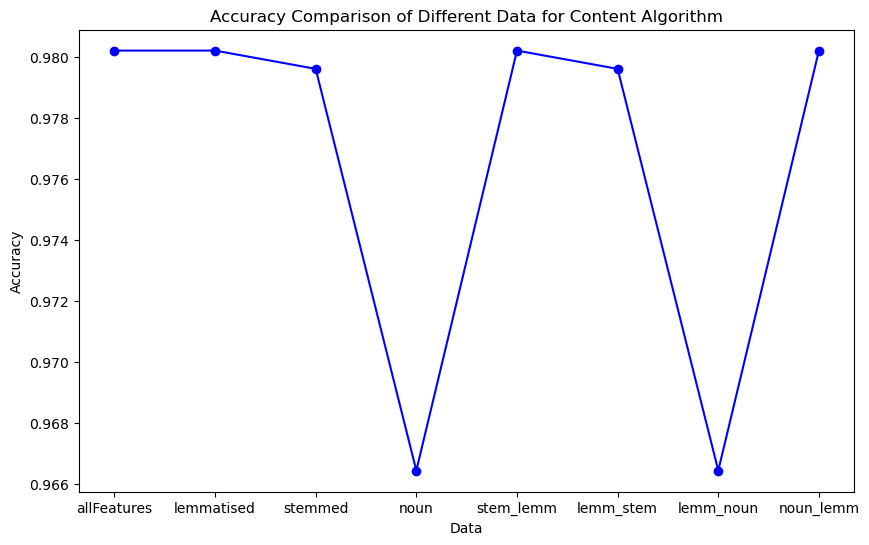

In [14]:
data = ['allFeatures', 'lemmatised', 'stemmed', 'noun', 'stem_lemm', 'lemm_stem', 'lemm_noun', 'noun_lemm']
accuracy = [accuracy_af, accuracy_lem, accuracy_stem, accuracy_noun, accuracy_stem_lemm, accuracy_lemm_stem, accuracy_lemm_noun, accuracy_noun_lemm]

fig = plt.figure(figsize=(10, 6))

plt.plot(data, accuracy, marker='o', color='blue', label='Accuracy')

plt.xlabel('Data')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Data for Content Algorithm')

plt.show()

[0.9841165833177518, 0.984249192446793, 0.9841407218504665, 0.9677450847358063, 0.984249192446793, 0.9841407218504665, 0.9677450847358063, 0.984249192446793]
0.984249192446793


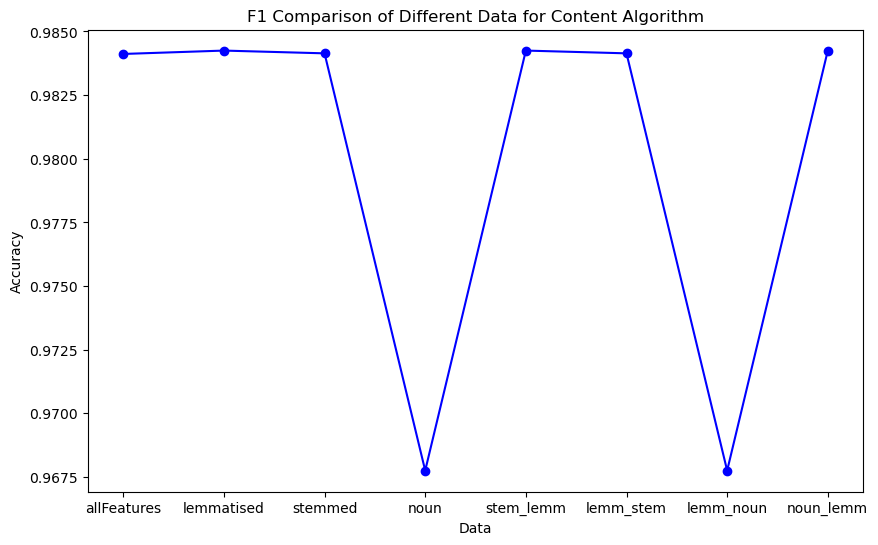

In [15]:
data = ['allFeatures', 'lemmatised', 'stemmed', 'noun', 'stem_lemm', 'lemm_stem', 'lemm_noun', 'noun_lemm']
accuracy = [f1_af, f1_lem, f1_stem, f1_noun, f1_stem_lemm, f1_lemm_stem, f1_lemm_noun, f1_noun_lemm]
print(accuracy)
print(max(accuracy))
fig = plt.figure(figsize=(10, 6))
plt.plot(data, accuracy, marker='o', color='blue', label='Accuracy')

plt.xlabel('Data')
plt.ylabel('Accuracy')
plt.title('F1 Comparison of Different Data for Content Algorithm')

plt.show()

[2.3598029613494873, 2.3320441246032715, 2.2985639572143555, 2.1062145233154297, 2.38014817237854, 2.3100247383117676, 2.1159141063690186, 2.300117254257202]


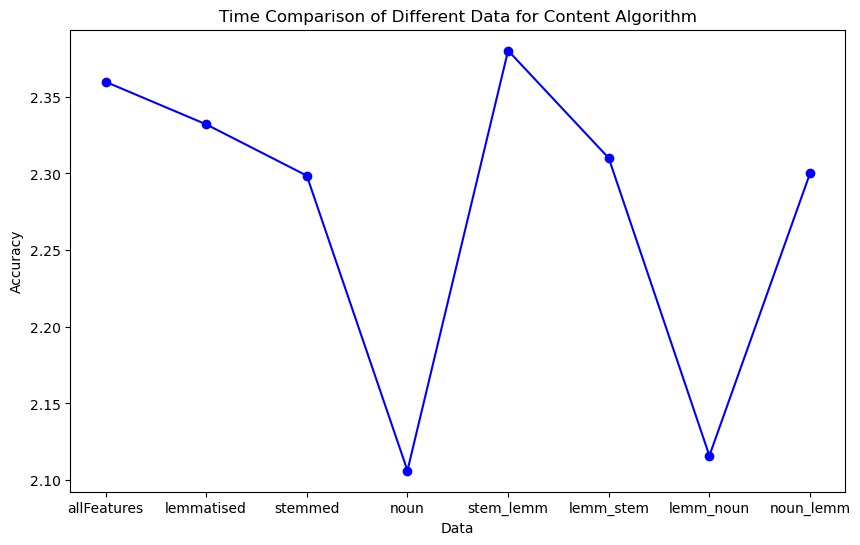

In [16]:
data = ['allFeatures', 'lemmatised', 'stemmed', 'noun', 'stem_lemm', 'lemm_stem', 'lemm_noun', 'noun_lemm']
accuracy = [time_af, time_lem, time_stem, time_noun, time_stem_lemm, time_lemm_stem, time_lemm_noun, time_noun_lemm]
print(accuracy)
fig = plt.figure(figsize=(10, 6))
plt.plot(data, accuracy, marker='o', color='blue', label='Accuracy')

plt.xlabel('Data')
plt.ylabel('Accuracy')
plt.title('Time Comparison of Different Data for Content Algorithm')

plt.show()

## Ранжирование

In [17]:
predicted_labels, accuracy_af, precision_af, recall_af, f1_af = content_filtering('allFeatures')

## Разнообразие

In [19]:
from collections import Counter
def diversity(predicted_labels):
    counts = Counter(predicted_labels)
    num_labels = len(predicted_labels)
    diversity_score = 1 - sum([(count/num_labels)**2 for count in counts.values()])
    return diversity_score

diversity_score = diversity(predicted_labels)
print(diversity_score)

0.9469215994111186


## Новизна

In [20]:
df_new = df.iloc[half_size*2:half_size*3]

In [27]:
def novelty(test_labels, predicted_labels):
    unique_test_labels = set(test_labels)
    #print(unique_test_labels)
    unique_predicted_labels = set(predicted_labels)
    novel_labels = unique_predicted_labels - unique_test_labels
    novelty_score = len(novel_labels) / len(unique_predicted_labels)
    return novelty_score

novelty_score = novelty(test_data['articleType'], predicted_labels)
print("Novelty score:", novelty_score)

Novelty score: 0.17647058823529413


## Ранжирование at k

In [24]:
def ndcg_at_k_score(y_true, y_pred, k):
    relevance = np.where(y_true == y_pred, 1, 0)
    sorted_relevance = relevance.argsort()[::-1][:k]
    dcg = np.sum(relevance[sorted_relevance] / np.log2(np.arange(2, k+2)))
    idcg = np.sum([1 / np.log2(i+2) for i in range(min(k, len(relevance)))])
    ndcg = dcg / idcg
    return ndcg

ndcg = ndcg_at_k_score(test_data['articleType'], predicted_labels, k=1600)
print(ndcg)

1.0
